Analysis 3:  
Is the life expectancy affected by type of energy consumption (renewable vs fossil fuels) globally?

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Make a reference to the csv file path
csv_path = Path("energyLEclean_NA.csv")

# Import the csv file as a DataFrame
data_df = pd.read_csv(csv_path)

# check the df
data_df.head()

,Unnamed: 0,Location,Year,population,fossil_energy_per_capita,renewables_energy_per_capita,energy_per_capita,Record Counter,LEx,LE15,LE65,LE80
0,87,Africa,1965,321447378.0,2100.505,127.918,2228.423,27,43.4401,45.7137,11.2665,4.9844
1,88,Africa,1966,329658389.0,2136.364,139.123,2275.487,27,43.4330,45.6340,11.2447,4.9787
2,89,Africa,1967,338159967.0,2099.772,141.577,2241.349,27,43.6456,45.5410,11.2492,4.9786
3,90,Africa,1968,346980412.0,2145.930,161.394,2307.324,27,44.1023,45.8270,11.3158,4.9931
4,91,Africa,1969,356070643.0,2126.871,183.537,2310.408,27,44.3156,45.8841,11.3276,4.9919


In [3]:
# Reduce df to only columns needed for this analysis
# Only keep year, energy source, and LEx
reduced_df = data_df[["Year", "fossil_energy_per_capita", "renewables_energy_per_capita", "LEx"]]
reduced_df.head()

# Description of the columns:
# - Year: year in which survey was conducted.
# - fossil_energy_per_capita: Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.
# - renewables_energy_per_capita: Per capita primary energy consumption from renewables, measured in kilowatt-hours
# - LEx: Life expectancy (as assessed from time of birth)

,Year,fossil_energy_per_capita,renewables_energy_per_capita,LEx
0,1965,2100.505,127.918,43.4401
1,1966,2136.364,139.123,43.4330
2,1967,2099.772,141.577,43.6456
3,1968,2145.930,161.394,44.1023
4,1969,2126.871,183.537,44.3156


In [4]:
# Rename the headers to be more explanatory and export to a csv
energy_sources_LE_df = reduced_df.rename(columns={"fossil_energy_per_capita": "Fossil Fuel Energy Sources",
                                        "renewables_energy_per_capita": "Renewable Energy Sources",
                                        "LEx" : "Life Expectancy From Birth"})
energy_sources_LE_df.to_csv("energyLEclean_NA_energy_sources", index = False)
energy_sources_LE_df.head()

,Year,Fossil Fuel Energy Sources,Renewable Energy Sources,Life Expectancy From Birth
0,1965,2100.505,127.918,43.4401
1,1966,2136.364,139.123,43.4330
2,1967,2099.772,141.577,43.6456
3,1968,2145.930,161.394,44.1023
4,1969,2126.871,183.537,44.3156


In [5]:
energy_sources_LE_df.tail()

,Year,Fossil Fuel Energy Sources,Renewable Energy Sources,Life Expectancy From Birth
3547,2018,17641.861,2471.564,72.5759
3548,2019,17528.213,2573.853,72.7897
3549,2020,16509.020,2695.399,72.0361
3550,2021,17268.938,2822.497,71.0479
3551,2022,17208.133,2990.389,71.7135


In [6]:
# Set variables
years = np.arange(1965, 2023, 1)
year_1965 = energy_sources_LE_df.loc[(energy_sources_LE_df['Year'] == "1965")]
year_2020 = energy_sources_LE_df.loc[(energy_sources_LE_df['Year'] == "2020")]
fossil_fuels = "Fossil Fuel Energy Sources"
renewables = "Renewable Energy Sources"
LE_birth = "Life Expectancy From Birth"




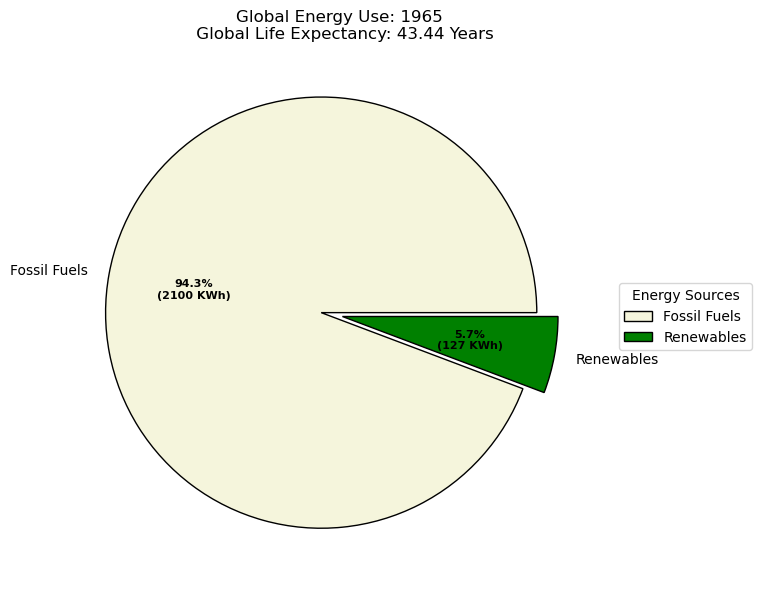

In [7]:
# graphs 1965
# Acknowledgement: https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
# primary energy sources (world) 1965

labels = ["Fossil Fuels", "Renewables"]
data = [2100.505, 127.918]
explode = (0.1, 0.0)
colors = ("beige", "green")

# wedge properties
wp = {'linewidth' : 1, 'edgecolor' : "black"}

# create autopct arguments
def func(pct, allvalues) :
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} KWh)".format(pct, absolute)

fig1, fig_1965 = plt.subplots(figsize = (10, 7))
wedges, texts, autotexts = fig_1965.pie(data,
                                        autopct = lambda pct : func(pct, data),
                                        explode = explode,
                                        labels = labels,
                                        shadow = False,
                                        colors = colors,
                                        startangle = 0,
                                        wedgeprops = wp,
                                        textprops = dict(color = "black"))

# add legend
fig_1965.legend(wedges, labels,
                title = "Energy Sources",
                loc = "center left",
                bbox_to_anchor = (1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
fig_1965.set_title("Global Energy Use: 1965 \n Global Life Expectancy: 43.44 Years")

# show plot
plt.show()





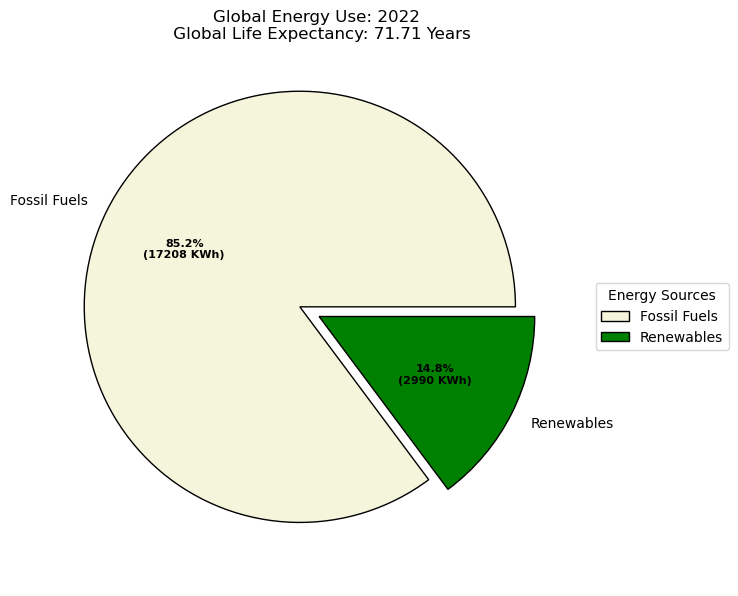

In [8]:
# graphs 2022
# Acknowledgement: https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
# primary energy sources (world) 1965

labels = ["Fossil Fuels", "Renewables"]
data = [17208.133, 2990.389]
explode = (0.1, 0.0)
colors = ("beige", "green")

# wedge properties
wp = {'linewidth' : 1, 'edgecolor' : "black"}

# create autopct arguments
def func(pct, allvalues) :
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} KWh)".format(pct, absolute)

fig1, fig_1965 = plt.subplots(figsize = (10, 7))
wedges, texts, autotexts = fig_1965.pie(data,
                                        autopct = lambda pct : func(pct, data),
                                        explode = explode,
                                        labels = labels,
                                        shadow = False,
                                        colors = colors,
                                        startangle = 0,
                                        wedgeprops = wp,
                                        textprops = dict(color = "black"))

# add legend
fig_1965.legend(wedges, labels,
                title = "Energy Sources",
                loc = "center left",
                bbox_to_anchor = (1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
fig_1965.set_title("Global Energy Use: 2022 \n Global Life Expectancy: 71.71 Years")

# show plot
plt.show()